In [1]:
import seaborn as sns

sns.set_theme()

In [2]:
# Read the dataset

words = open("names.txt").read().splitlines()
print(f"Using {len(words)} names")
words[:10]

Using 32033 names


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
# Explore the dataset
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

M = len(stoi)
print(M, itos)

27 {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
import jax.numpy as jnp

X = []
y = []
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        X.append(idx1)
        y.append(idx2)

X = jnp.array(X)
y = jnp.array(y)

X.shape, y.shape

((228146,), (228146,))

In [5]:
from jax import random, jit

key = random.key(42)
key, W_key = random.split(key)
# M is 27
W = random.normal(W_key, (M, M))

In [ ]:
from jax.nn import softmax
from jax import Array, vmap, value_and_grad


@jit
def loss_fn(x: int, y: int, W: Array):
    probs = softmax(W[x])
    return -jnp.log(probs[y])


@value_and_grad
@jit
def model(W):
    criterion = vmap(loss_fn, in_axes=(0, 0, None))
    loss = criterion(X, y, W)
    return loss.mean()


for i in range(1, 101):
    loss, grad = model(W)
    W -= 50 * grad
    if i % 10 == 0:
        print(f"Epoch {i}: {loss:.4f}")

Epoch 10: 2.7143
Epoch 20: 2.5823
Epoch 30: 2.5364
Epoch 40: 2.5139
Epoch 50: 2.5005
Epoch 60: 2.4917
Epoch 70: 2.4855
Epoch 80: 2.4809
Epoch 90: 2.4774
Epoch 100: 2.4746


<Axes: >

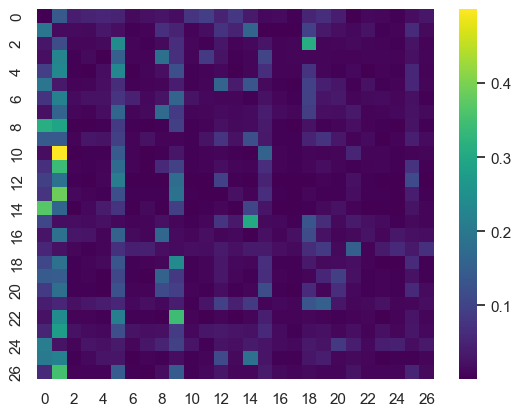

In [7]:
sns.heatmap(softmax(W), cmap="viridis")

In [8]:
from jax.random import categorical


def generate(key):
    out = []
    idx = 0
    while True:
        key, subkey = random.split(key)
        sampled = categorical(subkey, W[idx]).item()
        out.append(itos[sampled])
        idx = sampled
        if idx == 0:
            break
    return "".join(out)


for i in range(10):
    key, subkey = random.split(key)
    print(generate(subkey))

gn.
yve.
t.
amza.
lde.
sa.
soleyselyamayosziohhe.
cha.
rinann.
riaronann.
